Developer: **Rakesh Nain**

### Memory Event Consumer (5%)
Write a python program that consumes the memory events using kafka consumer, visualise
the record counts in real time. Save the file as
Assignment-2B-Task2_memory_consumer.ipynb.
Your program should get the count of records arriving in the last 2 minutes (use processing
time) for each machine, and use line charts to visualise.
- Hint - x-axis can be used to represent the timeline, while y-axis can be used to
represent the count; each machine’s line data can be represented in different color
legends


In [1]:
# import statements
from time import sleep
from kafka import KafkaConsumer
from datetime import datetime as dt
import matplotlib.pyplot as plt
import statistics
from json import loads

In [2]:
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

<IPython.core.display.Javascript object>


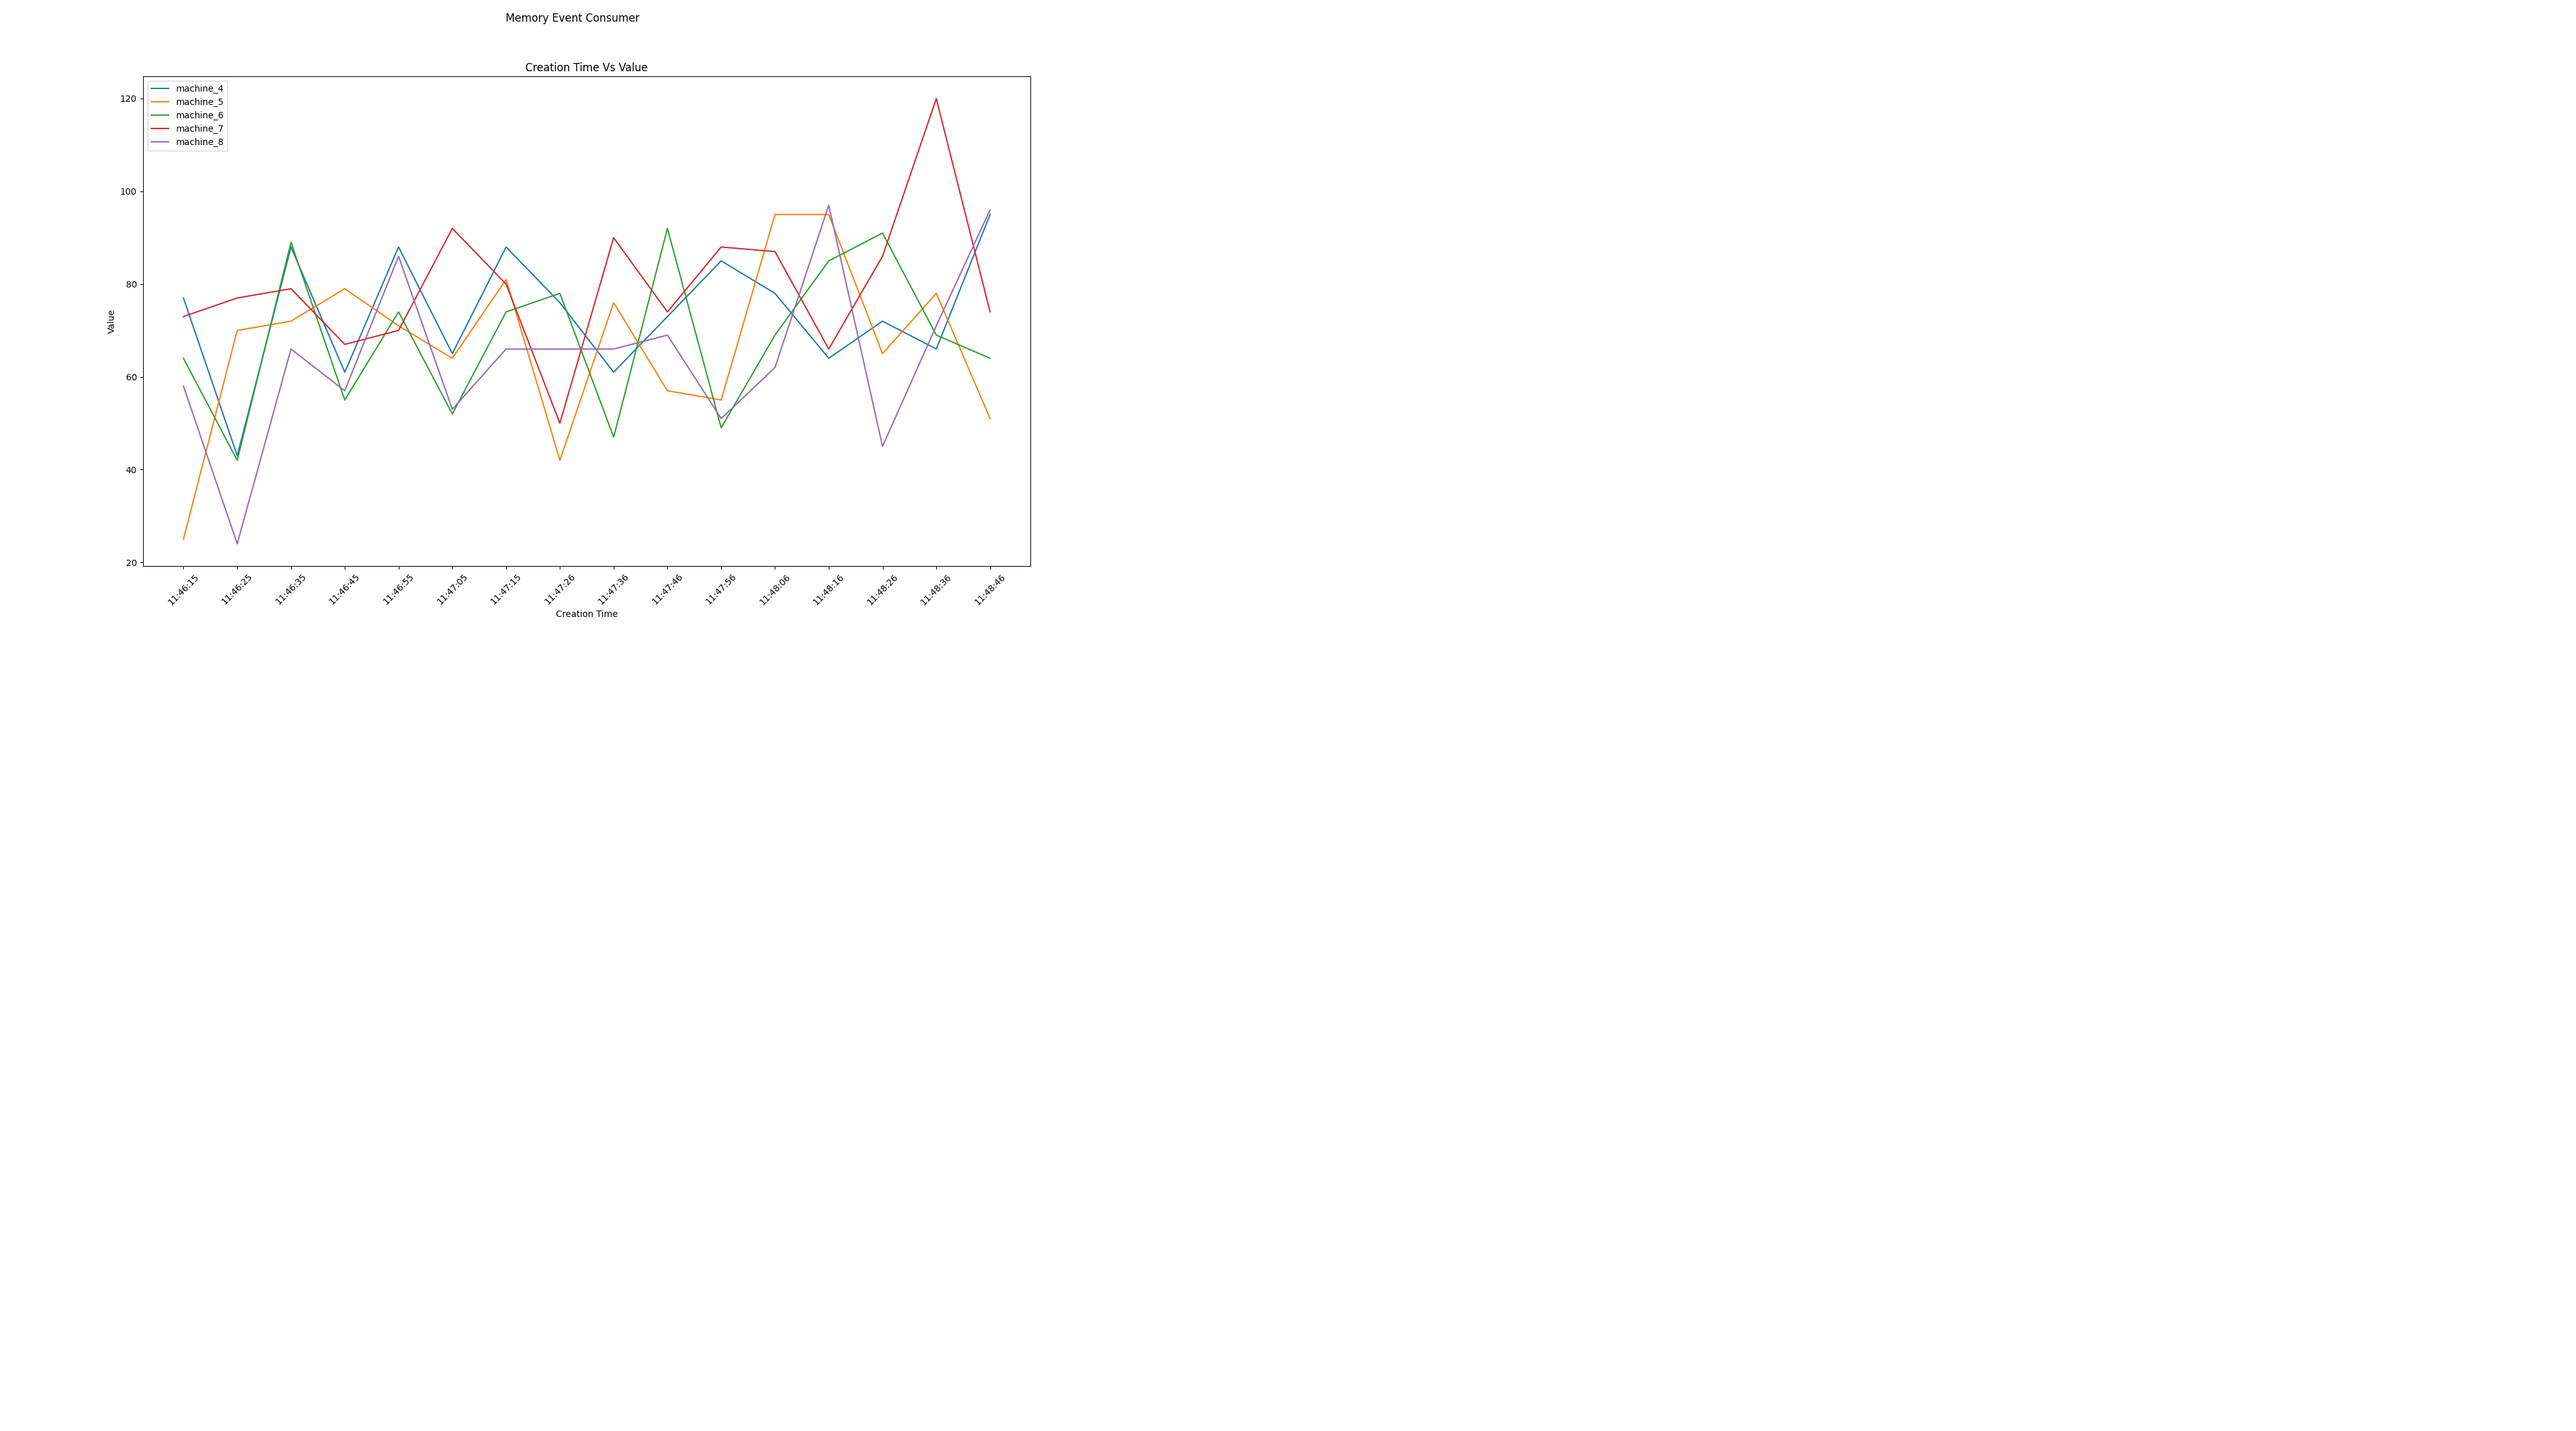

KeyboardInterrupt: 

In [3]:
topic = 'Streaming_Linux_memory5'

def annotate_max(x, y, ax = None):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    text = 'Max: Time={}, Value={}'.format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    ymin = min(y)
    xpos = y.index(ymin)
    xmin = x[xpos]
    text = 'Min: Time={}, Value={}'.format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=100000,
                                   auto_offset_reset='earliest',
                                   bootstrap_servers=['localhost:9092'],
                                   value_deserializer=lambda x: loads(x.decode('ascii')),
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 18
        height = 10
        fig = plt.figure(figsize=(width,height))
        fig.subplots_adjust(hspace=0.8)
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        fig.suptitle('Memory Event Consumer')
        fig.show()
        fig.canvas.draw()
        return fig, ax1
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax1):

    x1, y1, y2, y3, y4, y5 = [], [], [], [], [], []
    check = 0

    for message in consumer:
        machines_set = set()
        for a in message.value:

            machines_set.add(a['machine'])   
        
        machine_list = list(machines_set)
          
        g = globals()
        for m_num in machine_list:
            g['machine_{0}'.format(m_num)] = []
        
        for m_num in machine_list:
            for row in message.value:
                if row['machine'] == m_num:
                    g['machine_{0}'.format(m_num)].append(row)
                
        data_machine = []           
        for m_num in machine_list:       
            data_machine.append(g['machine_{0}'.format(m_num)])
            
        machine_length = []
        for m_data in data_machine:
            machine_length.append(len(m_data))
                
        y1.append(machine_length[0])
        y2.append(machine_length[1])
        y3.append(machine_length[2])
        y4.append(machine_length[3])
        y5.append(machine_length[4])
            
            
        x1.append(dt.fromtimestamp(data_machine[0][0]['ts']).strftime('%X'))
            
        if len(x1) > 15:  
            ax1.clear()
            ax1.plot(x1, y1, label= "machine_" + str(machine_list[0]))
            ax1.plot(x1, y2, label= "machine_" + str(machine_list[1]))
            ax1.plot(x1, y3, label= "machine_" + str(machine_list[2]))
            ax1.plot(x1, y4, label= "machine_" + str(machine_list[3]))
            ax1.plot(x1, y5, label= "machine_" + str(machine_list[4]))
            ax1.legend()
            ax1.set_xlabel('Creation Time')
            ax1.set_ylabel('Value')
            ax1.set_title('Creation Time Vs Value')
            plt.xticks(rotation=45)
            
            fig.canvas.draw()
            x1.pop(0)
            y1.pop(0)
            y2.pop(0)
            y3.pop(0)
            y4.pop(0)
            y5.pop(0)
    sleep(10)            
    plt.close('all')

    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax1 = init_plots()
    consume_messages(consumer, fig, ax1)